In [129]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from typing import List,Tuple, Union, Iterator
import torch
from torchvision import transforms

In [186]:
def flatten(func):
    """Flats a nested list to a normal list if the sublists have the lenght of 1."""
    def wrapper(*args):
        nested_list = func(*args)
        if isinstance(nested_list[0], list) and len(nested_list[0]) == 1:
            return [elm for sublist in nested_list for elm in sublist]
        return nested_list
    return wrapper



class CUBDataset(Dataset):
    """Dataset of the Caltech-UCSD Birds-200-2011 Data."""
    def __init__(self, seq_size: int = 3, root: str = "datasets/CUB_200_2011/"):
        self.seq_size = seq_size
        self.root = root
        self.filepath = "images/"
        self.basesize = 448
        images = self._read_file("images.txt")
        labels = self._read_file("image_class_labels.txt", True)
        train_test = self._read_file("train_test_split.txt", True)
        bounding_boxes = self._read_file("bounding_boxes.txt", True)
        bounding_boxes = [[bb[1],bb[1]+bb[3],bb[0],bb[0]+bb[2]] for bb in bounding_boxes]
        print(max([(bb[1]-bb[0],bb[3]-bb[2]) for bb in bounding_boxes]))
        
        # check if all lists have the same lenght.
        assert all(len(images) == len(l) for l in [labels, train_test, bounding_boxes])
        
        self.train = np.array([[img, bb, label] for img, x, bb, label in zip(images, train_test, bounding_boxes,labels) if x])
        self.test = np.array([[img, bb, label] for img, x, bb, label in zip(images, train_test, bounding_boxes, labels) if not x])        
        
        
    @flatten
    def _read_file(self, file: str, as_int: bool = False) -> List[List[Union[str, int]]]:
        """Reads a specific file and returns a nested List.
        
        file: filepath which will be opened
        as_int: boolean which transforms the read file from string to int"""
        data = [line.split()[1:] for line in open(self.root + file)]
        if as_int:
            data = [[int(float(elm)) for elm in sublist] for sublist in data]
        return data
    
    
    def __len__(self) -> int:
        """Returns the count of all bird folders which seperate the images."""
        return len(set(self.train[:,-1]) & set(self.test[:,-1]))
    
    
    def __getitem__(self, idx: int):
        idx += 1
        train_data = self._load_image(self.train[np.where(self.train[:,-1] == idx)][:,:-1])
        x = train_data
        y = idx
        return x,y
    
    
    def _load_image(self, data: List[Tuple[str,List[int]]]) -> Iterator[np.ndarray]:
        """
        Loads images, transforms them into a numpy matrix and crops them to the right size
        that only the bird is left in the picture and returns a generator of matrices.
        
        data: is a list of tuples. The first element in the tuple points to an image file and the second element
                 are coordinates to crop a smaller part of the image."""
        images = list()
        for img, box in data[0:29]:
           # yield np.array(Image.open(self.root + self.filepath + img))[box[0]:box[1],box[2]:box[3]]
            img = Image.open(self.root + self.filepath + img)
            img = transforms.Resize((self.basesize, self.basesize), Image.BILINEAR)(img)
            img = transforms.ToTensor()(img)
            img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
            m_img = np.array(img)
            if len(m_img.shape) == 2:
                m_img = np.stack((m_img,m_img,m_img),axis=2).astype(np.uint8)
            
            images.append(m_img)
            
        return images
    

            

In [187]:
from torch.utils.data import DataLoader

In [188]:
cub = CUBDataset()

(497, 493)


In [177]:
loader = DataLoader(dataset=cub, batch_size=3)

In [183]:
for img,labels in loader:
    for i in img:
        for b in i:
            print(b.shape)

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([448, 448, 3])
torch.Size([

In [168]:
for idx in range(len(cub)):
    print(idx,len(cub.train[np.where(cub.train[:,-1] == idx)][:,:-1]))
    

0 0
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
30 30
31 30
32 30
33 30
34 30
35 30
36 30
37 30
38 30
39 30
40 30
41 30
42 30
43 30
44 30
45 30
46 30
47 30
48 30
49 30
50 30
51 30
52 30
53 30
54 30
55 30
56 30
57 30
58 30
59 30
60 30
61 30
62 30
63 30
64 30
65 30
66 30
67 30
68 30
69 30
70 30
71 30
72 30
73 30
74 30
75 30
76 30
77 30
78 30
79 30
80 30
81 30
82 30
83 30
84 30
85 30
86 30
87 30
88 30
89 30
90 30
91 30
92 30
93 30
94 30
95 30
96 30
97 30
98 30
99 30
100 30
101 30
102 30
103 30
104 30
105 30
106 30
107 29
108 30
109 30
110 30
111 30
112 30
113 30
114 30
115 30
116 30
117 30
118 30
119 30
120 30
121 30
122 30
123 30
124 30
125 30
126 29
127 30
128 30
129 30
130 30
131 30
132 30
133 30
134 30
135 29
136 30
137 30
138 30
139 30
140 30
141 29
142 30
143 30
144 30
145 30
146 30
147 30
148 30
149 30
150 30
151 30
152 30
153 30
154 30
155 30
156 30
157 30
158 3

In [145]:
schwarz = np.array(Image.open(cub.root+cub.filepath+'025.Pelagic_Cormorant/'+'Pelagic_Cormorant_0022_23802.jpg'))

In [107]:
m,bb = list(cub[7])

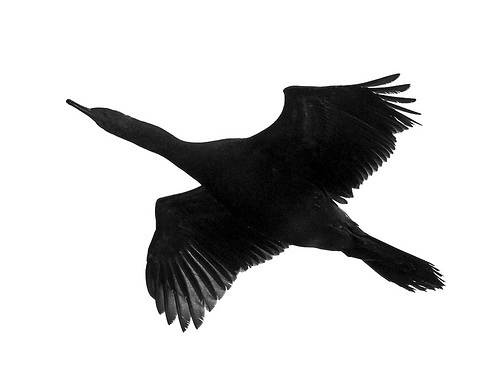

In [151]:
Image.fromarray(np.stack((schwarz,schwarz,schwarz),axis=2).astype(np.uint8))

In [108]:
img = Image.fromarray(m)

In [109]:
m.shape

(335, 500, 3)

In [74]:
area = (bb[1]-bb[0],bb[3]-bb[2])

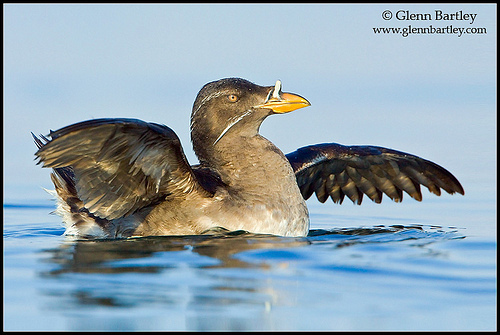

In [110]:
img

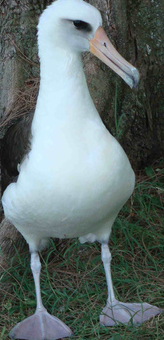

In [84]:
Image.fromarray(np.array(img)[bb[0]:bb[1],bb[2]:bb[3]])

In [82]:
p = m.shape[0]/448
height = int(m.shape[0]/p)
width = int(m.shape[1]/p)
bb0 = int(bb[0]/p)
bb1 = int(bb[1]/p)
bb2 = int(bb[2]/p)
bb3 = int(bb[3]/p)

bb0,bb1,bb2,bb3,height,width

(33, 439, 241, 437, 448, 597)

In [79]:
bb

[28, 368, 202, 366]

In [72]:
imgnew = img.resize((width, height), Image.ANTIALIAS)

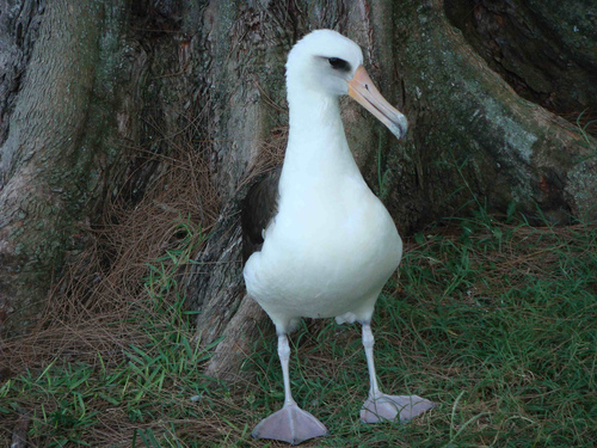

In [73]:
imgnew

In [89]:
np.array(imgnew)[:,width-height:].shape

(448, 448, 3)

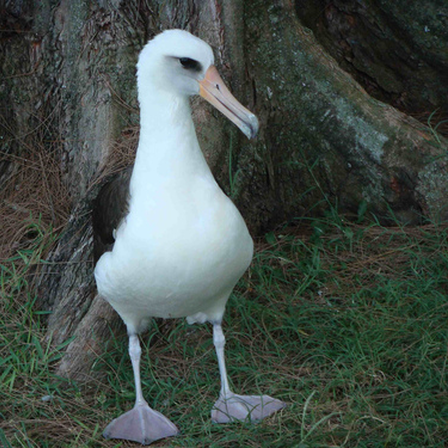

In [90]:
Image.fromarray(np.array(imgnew)[:,width-height:])

In [127]:
def resize_img(m,bb,basesize = 448,p = None):
    print("Matrix Shape: ",m.shape)
    if not p:
        p = m.shape[0]/basesize
        
    height = int(m.shape[0]/p)
    width = int(m.shape[1]/p)
    bb0 = int(bb[0]/p)
    bb1 = int(bb[1]/p)
    bb2 = int(bb[2]/p)
    bb3 = int(bb[3]/p)
    print("Hohe,Breite nach Skalierung: ",height,width)
    print(p)
    
    if bb3-bb2>basesize or bb1-bb0>basesize:
        p = max(bb[3]-bb[2],bb[1]-bb[0])/basesize
        print(p,max(bb[3]-bb[2],bb[1]-bb[0]))
        return resize_img(m,bb,p=p)
    img = Image.fromarray(m)
    img = img.resize((width, height), Image.ANTIALIAS)
    
    m = np.array(img)[:,width-height:]
    print(bb,[bb0,bb1,bb2,bb3],m.shape)
    
    
    return Image.fromarray(m)
    
    
    

Matrix Shape:  (335, 500, 3)
Hohe,Breite nach Skalierung:  448 668
0.7477678571428571
0.9776785714285714 438
Matrix Shape:  (335, 500, 3)
Hohe,Breite nach Skalierung:  342 511
0.9776785714285714
[72, 239, 28, 466] [73, 244, 28, 476] (342, 342, 3)


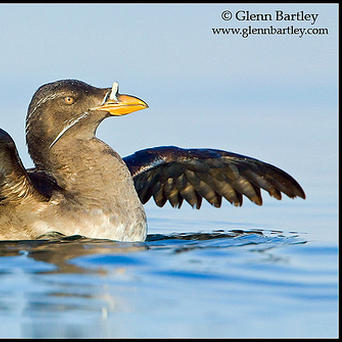

In [128]:
resize_img(*list(cub[7]))

In [19]:
10**5

100000

In [26]:
min_shape = (10**5,10**5,3)
min_shape

(100000, 100000, 3)

In [27]:
for i in range(len(cub)):
    for x in cub[i]:
        min_shape = min(x.shape,min_shape)
print(min_shape)


(100, 112, 3)


In [42]:
m1 = list(cub[1])[0]

In [44]:
m1.reshape(448,448,3)

ValueError: cannot reshape array of size 167280 into shape (448,448,3)

In [161]:
torch.tensor(m)

tensor([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 4,  4,  4],
         ...,
         [ 4,  4,  4],
         [ 1,  1,  1],
         [ 2,  2,  2]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 5,  5,  5],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 5,  5,  3],
         [ 0,  0,  0],
         [75, 75, 73],
         ...,
         [75, 75, 75],
         [ 1,  1,  1],
         [ 2,  2,  2]],

        ...,

        [[ 4,  4,  4],
         [ 0,  0,  0],
         [76, 76, 76],
         ...,
         [74, 74, 74],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  4],
         [ 2,  1,  6],
         [ 1,  0,  5],
         ...,
         [ 0,  0,  0],
         [ 3,  3,  3],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 1,  1,  1],
         [ 2,  2,  2],
         ...,
         [ 2,  2,  2],
         [ 1,  1,  1],
         [ 0,  0,  0]]], dtype=torch.uint8)

In [160]:
m

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  5,  3],
        [ 0,  0,  0],
        [75, 75, 73],
        ...,
        [75, 75, 75],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[ 4,  4,  4],
        [ 0,  0,  0],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  4],
        [ 2,  1,  6],
        [ 1,  0,  5],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [153]:
cub.train[:,-1] == 1

array([ True,  True,  True, ..., False, False, False])

In [147]:
cub = CUBDataset()

In [148]:
len(cub)

200

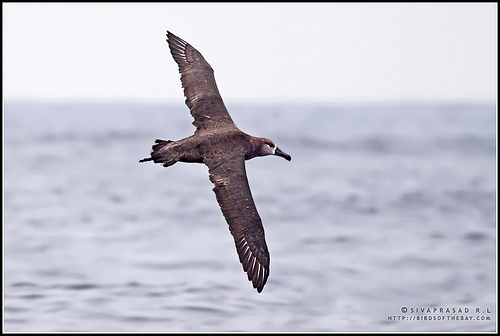

In [105]:
Image.open(filepath)

In [106]:
filepath,box = cub.root + "images/"+ cub.train[0][0], cub.train[0][1]

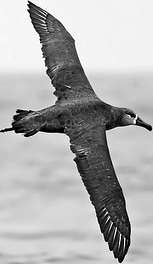

In [107]:
Image.fromarray(m2[box[0]:box[1],box[2]:box[3]])

SyntaxError: invalid syntax (<ipython-input-98-709854a0e9d5>, line 1)

In [92]:
box

[139, 30, 153, 264]

In [30]:
m = np.array(Image.open(filepath))

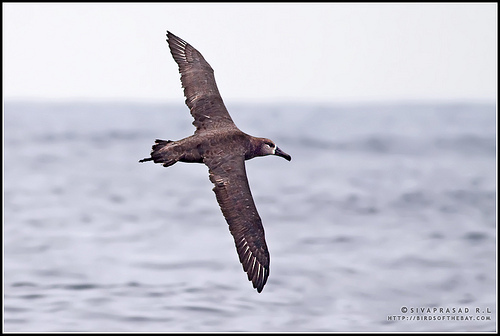

In [68]:
Image.fromarray(m)

In [80]:
m2 = m[:,:,2]

In [81]:
m0 = np.zeros(m2.shape)

In [84]:
m3 = np.stack((m0,m0,m2),axis = 2)

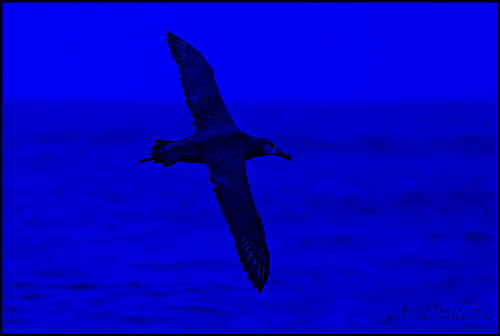

In [85]:
Image.fromarray(m3.astype(np.uint8))

In [67]:
print(type(m3),type(m))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [189]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'vgg19', pretrained=True)

Using cache found in C:\Users\valdo/.cache\torch\hub\pytorch_vision_v0.9.0


In [190]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [191]:
loader = DataLoader(dataset=cub, batch_size=3)

In [192]:
for input_batch,labels in loader:
    with torch.no_grad():
        output = model(input_batch)

TypeError: conv2d(): argument 'input' (position 1) must be Tensor, not list

In [ ]:
filepath = "datasets/CUB_200_2011/"
paths_with_col_names = {
    "images.txt": ("image_id", "image_name"),
    "train_test_split.txt": ("image_id", "is_training_image"),
    "image_class_labels.txt": ("image_id", "class_id"),
    "classes.txt": ("class_id", "class_name"),
    "bounding_boxes.txt": ("image_id", "bb_x", "bb_y", "bb_width", "bb_height"),
    "parts/part_locs.txt": ("image_id", "part_id", "p_x", "p_y", "p_visible"),
    "parts/parts.txt": ("part_id", "part_name"),
    "parts/part_click_locs.txt": ("image_id", "part_id", "p_mturk_x", "p_mturk_y", "p_mturk_visible", "p_mturk_time"),
    #"attributes/attributes.txt": ("attribute_id", "attribute_name"),
    #"attributes/certainties.txt": ("certainty_id", "certainty_name"),
    #"attributes/image_attribute_labels.txt": ("image_id", "attribute_id", "att_is_present", "certainty_id", "att_time", "_1", "_2"),
    #"attributes/class_attribute_labels_continuous.txt": ()
}

In [167]:
import pandas as pd
from collections import defaultdict
from functools import reduce

In [183]:
with open(filepath + "attributes/image_attribute_labels.txt", "r") as f:
    x = f.readlines()

In [184]:
pd.DataFrame([i.split() for i in x]).loc[:,5].unique()

KeyboardInterrupt: 

In [ ]:
pd.read_csv(filepath + "attributes/image_attribute_labels.txt", sep=r"(?<=\d)\s")

In [187]:
dataframes = [
    pd.read_csv(filepath + path, sep=r"(?<=\d)\s", names=col_names)
        .set_index([col for col in col_names if col.endswith("_id")])
    for path, col_names in paths.items()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [ ]:
df = reduce(lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True), dataframes)

In [ ]:
df